### Importing Libraries

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes


### Data Reading 

In [13]:
df = pd.read_csv('/home/manan/Desktop/Research/Learning-Perspectives/code/bstr.txt', sep=" ")

# changing the value of heads using the values in teacher's note
teachers_keywords = "/home/manan/Desktop/Research/Learning-Perspectives/data/data_notes/25n.txt"
temp_heads = []
heads = set()
openfile = open(teachers_keywords,'r')
readtext = openfile.read()
# reading into head
a = ""
for i in readtext:
    if i!=',':
        a = a+i
    else:
        heads.add(a)
        a = ""
heads.add("null")
for i in heads:
    temp_heads.append(i)

# changin colomuns into head
df.columns = heads
# cleaning
df = df.drop(columns="final product ",axis=0)

In [14]:
print(df.columns)

Index(['oo design good quality design ', 'test cases ', 'sprint refers ',
       'scrum process ', 'oo criticize ', 'alternative solutions oo ',
       'events scrum events ', 'oo extreme ', 'small teams ', 'product owner ',
       ...
       'large projects oo customer ', 'team reviews work ', 'simple system ',
       'prioritize work ', 'segmentation disadvantages ', 'projects oo ',
       'project advantages ', 'queue scrum artifacts ', 'business owner ',
       'customers needs '],
      dtype='object', length=242)


In [15]:
print(df.head())

   oo design good quality design   test cases   sprint refers   \
0                               0            1               0   
1                               0            0               0   
2                               0            1               0   
3                               0            1               1   
4                               0            1               0   

   scrum process   oo criticize   alternative solutions oo   \
0               1              0                          1   
1               0              0                          1   
2               1              0                          1   
3               0              0                          0   
4               0              0                          0   

   events scrum events   oo extreme   small teams   product owner   ...  \
0                     0            1             0               0  ...   
1                     0            0             0               0  ...   

### Data Inspection

In [16]:
df.shape

(52, 242)

In [17]:
df.describe

<bound method NDFrame.describe of     oo design good quality design   test cases   sprint refers   \
0                                0            1               0   
1                                0            0               0   
2                                0            1               0   
3                                0            1               1   
4                                0            1               0   
5                                0            1               1   
6                                0            1               0   
7                                0            1               1   
8                                0            1               0   
9                                0            1               0   
10                               0            1               0   
11                               1            1               1   
12                               0            1               1   
13                          

### Using K-Mode with "Cao" initialization

In [18]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2524.0


In [19]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df.columns

In [20]:
clusterCentroidsDf

,oo design good quality design,test cases,sprint refers,scrum process,oo criticize,alternative solutions oo,events scrum events,oo extreme,small teams,product owner,...,large projects oo customer,team reviews work,simple system,prioritize work,segmentation disadvantages,projects oo,project advantages,queue scrum artifacts,business owner,customers needs
0,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
1,1,1,1,1,1,1,1,0,1,1,...,1,1,1,0,0,1,1,1,1,1


### Using K-Mode with "Huang" initialization

In [21]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9, cost: 2498.0
Run 1, iteration: 2/100, moves: 12, cost: 2416.0
Run 1, iteration: 3/100, moves: 5, cost: 2378.0
Run 1, iteration: 4/100, moves: 0, cost: 2378.0


In [22]:
fitClusters_huang

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0], dtype=uint16)

### Testing Using Elbow Method

In [23]:
cost = []
for num_clusters in list(range(1,13)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2748.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2524.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 13, cost: 2168.0
Run 1, iteration: 2/100, moves: 0, cost: 2168.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 2130.0
Run 1, iteration: 2/100, moves: 7, cost: 2098.0
Run 1, iteration: 3/100, moves: 0, cost: 2098.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 2037.0
Run 1, iteration: 2/100, moves: 3, cost: 2021.0
Run 1, iteration: 3/100, moves: 0, cost: 2021.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost

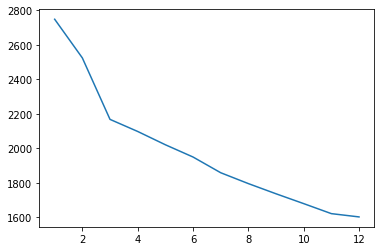

In [24]:
y = np.array([i for i in range(1,13)])
plt.plot(y,cost)

#### Value aroud 9-10 seems to be working fine

In [25]:
km_cao = KModes(n_clusters=9, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9, cost: 1737.0
Run 1, iteration: 2/100, moves: 0, cost: 1737.0


In [26]:
fitClusters_cao

array([2, 4, 0, 4, 0, 8, 4, 2, 4, 5, 0, 1, 0, 6, 6, 4, 7, 0, 0, 3, 2, 8,
       3, 1, 2, 2, 7, 0, 2, 2, 8, 3, 7, 5, 7, 2, 0, 0, 0, 8, 8, 2, 8, 2,
       2, 8, 0, 3, 2, 8, 8, 8], dtype=uint16)

### What is the distribution of clusters

(array([11.,  2., 12.,  4.,  5.,  2.,  2., 14.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 8 Patch objects>)

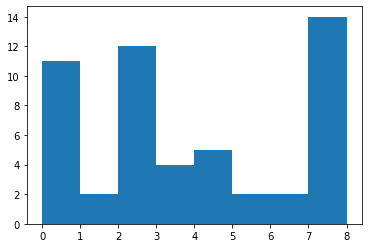

In [27]:
plt.hist(fitClusters_cao,bins=np.arange(fitClusters_cao.min(), fitClusters_cao.max()+1))

In [29]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df.columns

In [30]:
clusterCentroidsDf

,oo design good quality design,test cases,sprint refers,scrum process,oo criticize,alternative solutions oo,events scrum events,oo extreme,small teams,product owner,...,large projects oo customer,team reviews work,simple system,prioritize work,segmentation disadvantages,projects oo,project advantages,queue scrum artifacts,business owner,customers needs
0,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,1
1,1,1,1,1,1,1,1,0,1,1,...,1,1,1,0,0,1,1,1,1,1
2,0,1,0,0,0,1,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
3,0,1,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,1,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
5,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
6,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
7,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
8,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1


### Analyzing the clusters !

In [31]:
clusterCentroidsDf["sum"] = clusterCentroidsDf.sum(axis=1)

In [32]:
clusterCentroidsDf

,oo design good quality design,test cases,sprint refers,scrum process,oo criticize,alternative solutions oo,events scrum events,oo extreme,small teams,product owner,...,team reviews work,simple system,prioritize work,segmentation disadvantages,projects oo,project advantages,queue scrum artifacts,business owner,customers needs,sum
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,1,0,0,1,91
1,1,1,1,1,1,1,1,0,1,1,...,1,1,0,0,1,1,1,1,1,198
2,0,1,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,91
3,0,1,1,0,0,1,0,0,0,0,...,1,0,1,0,1,1,0,0,1,115
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,54
5,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,89
6,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,56
7,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,72
8,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,97


### Clusters of so called "intelligent students"

In [33]:
ccdf = clusterCentroidsDf
ccdf.loc[ccdf["sum"]>=90]

,oo design good quality design,test cases,sprint refers,scrum process,oo criticize,alternative solutions oo,events scrum events,oo extreme,small teams,product owner,...,team reviews work,simple system,prioritize work,segmentation disadvantages,projects oo,project advantages,queue scrum artifacts,business owner,customers needs,sum
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,1,0,0,1,91
1,1,1,1,1,1,1,1,0,1,1,...,1,1,0,0,1,1,1,1,1,198
2,0,1,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,91
3,0,1,1,0,0,1,0,0,0,0,...,1,0,1,0,1,1,0,0,1,115
8,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,97


In [34]:
ccdf.iloc[8]

oo design good quality design      0
test cases                         1
sprint refers                      0
scrum process                      0
oo criticize                       0
                                  ..
project advantages                 1
queue scrum artifacts              0
business owner                     0
customers needs                    1
sum                               97
Name: 8, Length: 243, dtype: int64

In [35]:
count = 0 
for i in ccdf.iloc[1]:
  if  i == 1:
        print(temp_heads[count])
  count = count + 1 

oo design good quality design 
test cases 
sprint refers 
scrum process 
oo criticize 
alternative solutions oo 
events scrum events 
small teams 
product owner 
 scrum 
agile software development 
continuous success 
oo code review code review detects 
proper design 
important software development framework 
project learning process 
success oo 
short iterations 
exact customer 
defect rates 
short iterative fdd lifecycle 
oo projects 
levels fdd lifecycle oo 
good design results elimination 
large upfront specs 
oo feedback 
view applications 
lifecycle builds 
simple program 
y axis work 
hour oo 
customer mission statement etc 
backlog refinement sprint backlog 
drawing diagrams 
oo fdd 
frequent contact 
mentors oo 
agile practice 
main motive os featuredriven development 
system asd focuses 
product backlog 
scrum master 
rugby formation 
delays unclear requirements 
team member 
selforganisation asd life cycle incorporates 
simple premise 
team empowerment 
increment sprint retr

### Deriving Main Concepts from the selected keywords

In [36]:
renmap={'important goal ': 'goal', 'project team ': 'Project team', 'small projects xp model ': 'Curtiss P-40 Warhawk variants', 'new technology ': 'technology', 'domain model ': 'domain model', 'downward trend ': 'market trend', 'oo communicate problems ': 'NATO phonetic alphabet', 'emphasises teamwork accountability ': 'soft skills', 'scrum roles ': 'Scrum', 'events scrum events ': 'Scrum', 'oo incremental development incremental development ': 'systems development life-cycle', 'good pace ': 'Lee Pace', 'agile software development ': 'agile software development', 'project advantages ': 'comparative advantage', 'projects oo ': 'oOoOO', 'animosity oo ': 'Melayu Kingdom', 'backlog items ': 'Scrum', 'system implementation ': 'implementation', ' methodology principles ': 'methodology', 'drawing diagrams ': 'schematic', 'metaphors metaphors ': 'metaphor', 'user stories user stories ': 'user story', 'delays unclear requirements ': 'blowback', 'product development ': 'new product development', 'human collaboration ': 'Human-robot collaboration', 'code quality ': 'software quality', 'sprint ends ': 'Scrum Sprint', 'business owner ': 'businessperson', 'present time ': 'present', 'issue afterwards ': 'Paula Coughlin', 'product owner ': 'Scrum', 'reflects ': 'No label defined', 'previous day ': 'day', 'short iterative fdd lifecycle ': 'Feature-driven developmen', 'good quality code ': 'software quality', 'principles of waste elimination ': 'zero waste', 'team learning yield software project teams ': 'machine learning', 'product backlog items ': 'Scrum', 'code oo ': 'OO', 'lean development principles ': 'Lean software development', 'circumstances ': 'Circumstance', 'conventional description ': 'vanilla sex', 'fast delivery ': 'fast bowling', 'alternative solutions oo ': 'Object-relational impedance mismatch', 'difficult part ': 'Difficult People', 'tdd approach test cases ': 'test-driven development', 'shortest time frame gain ': 'scalping', 'incremental releases ': 'incremental game', 'identify bugs ': 'Bugs Moran', 'initial activities ': 'initial public offering', 'continuous releases ': 'Controlled release', 'ensure architecture ': 'architecture', 'own understanding ': 'understanding', 'cost estimation ': 'cost estimate', 'x axis time ': 'Cartesian coordinate system', 'business value ': 'Business value', 'test cases ': 'test case', 'lifecycle builds ': 'application lifecycle management', 'important software development framework ': 'software framework', 'final product ': 'final product', 'system asd focuses ': 'autism spectrum', 'speculation collaboration learning ': 'social learning tools', 'encourages practitioners ': 'Organ harvesting from Falun Gong practitioners in China', 'good quality software ': 'software quality', 'queue scrum artifacts ': 'continuous integration', 'oo fdd ': 'list of computing and IT abbreviations', 'software quality ': 'software quality', 'overall model oo ': 'rail transport modelling', 'whole waste ': 'whole foods', 'development team ': 'United States Naval Special Warfare Development Group', 'proper design ': 'Action at a distance', 'daily scrum ': 'Scrum', 'team member ': 'Microsoft Teams', 'customer mission statement etc ': 'customer experience', 'product ': 'product', 'lean development focuses ': 'Lean Six Sigma', 'effective solution learning ': 'E-learning (theory)', 'scrum development team ': 'Scrum', 'sprint process ': 'Design sprint', 'meetings ': 'meeting', 'complex software ': 'history of software engineering', 'owner ': 'ownership', 'product increment ': 'Scrum', 'common problem ': 'Longest common subsequence problem', 'mentors oo ': 'I-LAND', 'continuous success ': 'Soundarya', 'possible oo possession ': 'Elisabeth von Senitz', 'lean development': 'Lean software development', 'developers needs ': 'programmer', 'oo extreme ': 'extreme ultraviolet lithography', 'different scenarios ': 'Bubble bump football', 'user stories ': 'user story', 'customer feedback ': 'customer service', 'unforeseen ': 'Unforeseen Incidents', 'possible integrity ': 'data integrity', 'projects oo reduction ': 'Phonological history of English consonant clusters', 'informal statements ': 'informal sector', 'organizations incorporate ': 'incorporation', 'phase project ': 'project management', 'scrum revolve ': 'software development process', 'project management ': 'project management', 'project completion sprint planning meeting ': 'Planning poker', 'product backlog ': 'Scrum', 'rugby formation ': 'formation', 'team members ': 'list of Doom Patrol members', 'sprint review ': 'Scrum Sprint', 'corrects errors ': 'ECC memory', 'individual creativity ': 'creativity', 'small projects ': 'project', 'iterative development ': 'iterative and incremental development', 'agile practice ': 'agile software development', 'project learning process ': 'Project-based learning', 'agile iterations ': 'agile software development', 'oo criticize ': 'DuckTales', 'defect rates ': 'neural tube defect', 'incremental model ': 'Incremental build model', 'lean development ': 'Lean software development', 'customers oo ': 'Next Jump', 'frequent contact ': 'Negro Republican Party', 'scrum process ': 'Scrum', 'important aspects ': 'astrological aspect', 'primary factor ': 'factor of production', 'short iterations ': 'iteration', 'scrum development ': 'Scrum', 'good practices needs ': 'best practice', 'activities oo ': 'Oahu', 'backlog refinement sprint backlog ': 'Scrum', 'visual representation ': 'depictions of Muhammad', 'common vision ': 'Watershed management', 'large projects oo customer ': 'Hattons Model Railways', 'scrum product development artifacts ': 'Scrum', 'specifications user stories ': 'User interface specification', 'short standup meeting ': 'Stand-up meeting', 'teams interpersonal collaboration ': 'High-performance teams', 'customers needs ': 'customer relationship management', 'technical problems ': 'Xbox 360 technical problems', 'new increments ': 'Incremental learning', 'small teams ': '2020 FIA Formula One World Championship', 'high importance ': 'importance', 'collaborates communication ': 'nonviolent communication', 'factors learning ': 'learning', 'list oo plan ': 'oOoOO', 'iterative progress ': 'iterative and incremental development', 'software development principles ': 'agile software development', 'project plan uses project initiation information ': 'Project plan', 'continuous integration ': 'continuous integration', 'main principle ': 'hydraulic press', 'fdd oo ': 'list of computing and IT abbreviations', 'team empowerment ': 'empowerment', 'depth knowledge ': 'knowledge', 'lean software development ': 'Lean software development', 'team reviews work ': 'technical peer review', 'simple system ': 'Really Simple Systems', 'release cycles ': 'software release life cycle', 'important part ': 'music', 'sprint refers ': 'Sprint', 'xp extreme ': 'extreme programming', 'increment sprint retrospective ': 'Scrum Sprint', 'meeting thats ': 'Johnny Rebel', 'chart illustrates ': 'Gantt chart', 'oo design good quality design ': 'reliability engineering', 'agile models ': 'agile modeling', 'ways focus groups ': 'focus group', 'scrum framework shows ': 'Scrum', 'program development projects ': 'software development process', 'suitable design ': 'Adobe InDesign', 'organizations ': 'organization', 'oo integration ': 'Go-oo', ' scrum ': 'Scrum', 'burndown chart ': 'burn down chart', 'major role ': 'role', 'basic activities ': 'activities of daily living', 'iteration oo simplicity simplicity ': 'LibreOffice', 'sprint retrospective ': 'Scrum', 'lead programmers designers ': 'game programmer', 'tim oo ': 'Tin Oo', 'scrum team scrum artifacts ': 'Scrum', 'builtin integrity ': 'list of MS-DOS system files', 'oo design ': 'General responsibility assignment software patterns', 'research projects ': 'DARPA', 'new applications ': 'New Drug Application', 'result learning ': 'learning', 'system components flow ': 'entity component system', 'effective oo simplicity ': '', 'extreme levels ': 'extreme programming', 'lean ': 'Lean', 'null': 'Null', 'xp model ': 'list of AMD Athlon XP microprocessors', 'simple premise ': 'false premise', 'resentment oo work ': 'Carmela Soprano', 'different functionalities extreme ': 'AirPort', 'view applications ': 'application', 'agile iterative ': 'agile software development', 'customer requirements ': 'requirement', 'y axis work ': 'Cartesian coordinate system', 'transparency inspection ': 'Scrum Sprint', 'usable piece ': 'Piece by Piece', 'oo projects ': 'oOoOO', 'high dependency ': 'High dependency unit', 'effective use ': 'biogas', 'simple program ': 'A New Kind of Science', 'learning ': 'learning', 'sprint planning ': 'Scrum', 'product backlog sprint backlog product increment ': 'Scrum', 'oo code review code review detects ': 'hydrogen peroxide', 'hour oo ': 'DuckTales', 'exact customer ': 'Customer data', 'large upfront specs ': 'Big Design Up Front', 'user story ': 'user story', 'complete fast simple improvements ': 'Windows 10 version history (20152016)', 'good design results elimination ': '2010 Elimination Chamber', 'time frame ': 'time', 'specific features ': 'domain-specific language', 'good practices ': 'Good manufacturing practice', 'complex dependencies ': 'dependency injection', 'basic principles ': '12 Basic Principles of Animation', 'segmentation disadvantages ': 'image segmentation', 'whole model ': 'Whole Atmosphere Community Climate Model', 'continuous improvement ': 'continual improvement process', 'unnecessary code ': 'minification', 'suggests pair ': 'pair programming', 'frequent iteration ': 'frequentative', 'software development ': 'software development', 'tom poppendieck ': 'Lean software development', 'previous sprints ': 'Scrum', 'oo feedback ': 'Model-Glue', 'finer details ': 'The devil is in the detail', 'future requirements applications ': 'requirements analysis', 'project requirements user ': 'software requirements specification', 'historical interest ': 'interest', 'team product ': 'Integrated product team'}

In [37]:
## checking if all the values in ccdf colmns are present in the map
## there is a space at the end of every keyword
print('small projects ')
if 'small projects ' not in renmap:
    print('not found')
else:
    print('found',renmap['small projects '])

print(len(renmap))

small projects 
found project
231


In [38]:
concmap = {'Functional specification': ['user story'], 'concept': ['importance'], 'computer language': ['domain-specific language'], 'time interval': ['day'], 'United States Special Operations Command': ['United States Naval Special Warfare Development Group'], 'psychology terminology': ['creativity', 'understanding'], 'biocombustible': ['biogas'], 'aspect': ['frequentative'], 'skill': ['soft skills'], 'hydraulic machine': ['hydraulic press'], 'Q101351324': ['LibreOffice'], 'conceptual model': ['domain model'], 'listing': ['initial public offering'], 'programming principle': ['General responsibility assignment software patterns'], 'software library': ['software framework'], 'nonviolence': ['nonviolent communication'], 'practice': ['best practice'], 'software developer': ['game programmer'], 'learning or memory': ['learning'], 'Q736495': ['No label defined'], 'political ecology': ['zero waste'], 'Q208004626467': ['Difficult People'], 'economic branch': ['software development'], 'activity': ['project', 'new product development'], 'art': ['music'], 'Q1718773117': ['hydrogen peroxide'], 'Hawaiian Islands': ['Oahu'], 'phonological history of English': ['Phonological history of English consonant clusters'], 'computer memory': ['ECC memory'], 'group of humans': ['organization', 'focus group', 'Project team'], 'software development methodology': ['agile software development', 'test-driven development'], 'minimization': ['minification'], 'data quality': ['data integrity'], 'aircraft': ['Curtiss P-40 Warhawk variants'], 'manufacturing': ['final product'], 'software': ['application'], 'casual game': ['incremental game'], 'conviction': ['knowledge'], 'rule': ['requirement'], 'test suite': ['test case'], 'experience': ['customer experience'], 'point in time': ['present'], 'orthogonal coordinates': ['Cartesian coordinate system'], 'firearm action': ['blowback'], 'pervasive developmental disorder': ['autism spectrum'], 'stylistic device': ['metaphor'], 'human activity': ['activities of daily living', 'meeting'], 'improvement': ['continual improvement process'], 'quality': ['software quality'], 'management': ['customer relationship management', 'project management'], 'service': ['customer service'], 'hospital': ['High dependency unit'], 'intention': ['goal'], 'scheme': ['formation'], 'artificial intelligence': ['machine learning'], 'human sexual activity': ['vanilla sex'], 'systems engineering': ['reliability engineering'], 'software development': ['requirements analysis', 'software release life cycle'], 'Windows 10 version history (2015\xe2\x80\x932016)': ['Windows 10 version history (20152016)'], 'construction': ['architecture'], 'law of obligations (Germany)': ['ownership'], 'graphics': ['schematic'], 'repetition': ['iteration'], 'estimation process': ['cost estimate'], 'peer review': ['technical peer review'], 'product management': ['application lifecycle management'], 'agile software development': ['pair programming', 'extreme programming'], 'history': ['history of software engineering'], 'system lifecycle': ['systems development life-cycle'], 'process': ['implementation', 'new product development', 'software release life cycle'], 'Republican Party': ['Negro Republican Party'], 'software development process': ['iterative and incremental development'], 'depiction': ['depictions of Muhammad'], 'economic value': ['Business value'], 'administration': ['empowerment'], 'computer vision': ['image segmentation'], 'document': ['New Drug Application'], 'economy': ['informal sector'], 'quality control method': ['continuous integration'], 'money amount': ['interest'], 'chart': ['Gantt chart', 'burn down chart'], 'model building': ['rail transport modelling'], 'professional': ['businessperson'], '1000111000': [''], 'analysis': ['methodology'], 'organ theft': ['Organ harvesting from Falun Gong practitioners in China'], 'Microsoft 365': ['Microsoft Teams'], 'applied science': ['technology'], 'Sprint': ['Stand-up meeting']}

In [39]:
concmap[renmap['small projects ']]
print(len(concmap))

KeyError: 'project'

### Which main concepts did the first cluster study??

In [40]:
count = 0 
for i in ccdf.iloc[1]:
  if  i == 1:
     temp = temp_heads[count]+''
     if temp in renmap:
        print("found renamed word",renmap[temp])
        if renmap[temp] in concmap:
            print(concmap[renmap[temp]])
        else:
            print("concept not found")
     else:
        print("renamed word not found")
  count = count + 1 

found renamed word reliability engineering
concept not found
found renamed word test case
concept not found
found renamed word Sprint
['Stand-up meeting']
found renamed word Scrum
concept not found
found renamed word DuckTales
concept not found
found renamed word Object-relational impedance mismatch
concept not found
found renamed word Scrum
concept not found
found renamed word 2020 FIA Formula One World Championship
concept not found
found renamed word Scrum
concept not found
found renamed word Scrum
concept not found
found renamed word agile software development
['pair programming', 'extreme programming']
found renamed word Soundarya
concept not found
found renamed word hydrogen peroxide
concept not found
found renamed word Action at a distance
concept not found
found renamed word software framework
concept not found
found renamed word Project-based learning
concept not found
renamed word not found
found renamed word iteration
concept not found
found renamed word Customer data
concep

### Let's see what concept are studied on the basis of renamed words

In [41]:
freq = {'null':0}
count = 0
for i in ccdf.iloc[1]:
 if i == 1:
    temp = temp_heads[count]+''
    if temp in renmap:
        if renmap[temp] in freq:
         freq[renmap[temp]] = freq[renmap[temp]]+1
        else:
         freq[renmap[temp]] = 1
 count = count + 1

sorted(freq.items(), key=lambda item: item[1],reverse=True)


[('Scrum', 17),
 ('Scrum Sprint', 4),
 ('agile software development', 3),
 ('oOoOO', 3),
 ('Lean software development', 3),
 ('learning', 3),
 ('DuckTales', 2),
 ('Cartesian coordinate system', 2),
 ('software quality', 2),
 ('extreme programming', 2),
 ('user story', 2),
 ('software development process', 2),
 ('continuous integration', 2),
 ('reliability engineering', 1),
 ('test case', 1),
 ('Sprint', 1),
 ('Object-relational impedance mismatch', 1),
 ('2020 FIA Formula One World Championship', 1),
 ('Soundarya', 1),
 ('hydrogen peroxide', 1),
 ('Action at a distance', 1),
 ('software framework', 1),
 ('Project-based learning', 1),
 ('iteration', 1),
 ('Customer data', 1),
 ('neural tube defect', 1),
 ('Feature-driven developmen', 1),
 ('2010 Elimination Chamber', 1),
 ('Big Design Up Front', 1),
 ('Model-Glue', 1),
 ('application', 1),
 ('application lifecycle management', 1),
 ('A New Kind of Science', 1),
 ('customer experience', 1),
 ('schematic', 1),
 ('list of computing and IT 

### Finally the main concepts are

- ('Scrum', 17),
- ('Scrum Sprint', 4),
- ('agile software development', 3),
- ('Lean software development', 3),
- ('learning', 3),
- ('DuckTales', 2),
- ('Cartesian coordinate system', 2),
- ('software quality', 2),
- ('extreme programming', 2),
- ('user story', 2),
- ('software development process', 2),
- ('continuous integration', 2),


### Concepts to search for:

* Those concepts that are missing in the clusters are to be searched in the web-pages of the main concepts
* List of Concepts that are missing from each cluster

In [59]:
searchfor = [[],[],[],[],[],[],[],[],[]]
for i in range(0,9):
    count = 0
    for j in ccdf.iloc[i]:
        if j == 0:
            if temp_heads[count] in renmap:
                searchfor[i].append(renmap[temp_heads[count]])
        count = count+1
        
## verifying the results by printing the amount of the nodes missing in the cluster and the size of the list
for i in range(0,9):
    count = 0
    for j in ccdf.iloc[i]:
        if j == 0:
            count = count + 1
    print(count,len(searchfor[i]))
    


151 143
44 42
151 144
127 123
188 177
153 143
186 176
170 160
145 138


## Topics Missed By the students

* For cluster zero `searchfor[0]`
* For cluster one  `searchfor[1]`

and so on ...